<a href="https://colab.research.google.com/github/subham129/Customer-Feedback-Analysis/blob/main/Customer_Feedback_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle


In [2]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ichigo129","key":"f767229e8351889ce1704c9014d77a63"}'}

In [3]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content"


In [4]:
!kaggle datasets download -d snap/amazon-fine-food-reviews


Dataset URL: https://www.kaggle.com/datasets/snap/amazon-fine-food-reviews
License(s): CC0-1.0
100% 242M/242M [00:14<00:00, 17.0MB/s]
100% 242M/242M [00:14<00:00, 17.2MB/s]


In [5]:
!unzip amazon-fine-food-reviews.zip


Archive:  amazon-fine-food-reviews.zip
  inflating: Reviews.csv             
  inflating: database.sqlite         
  inflating: hashes.txt              


In [6]:
import pandas as pd

df = pd.read_csv('Reviews.csv')
df.head()


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [7]:
df.shape

(568454, 10)

In [8]:
df.isnull().sum()

,0
Id,0
ProductId,0
UserId,0
ProfileName,26
HelpfulnessNumerator,0
HelpfulnessDenominator,0
Score,0
Time,0
Summary,27
Text,0


In [9]:
df.dropna(inplace=True)

In [10]:
df.describe()

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
count,568401.000000,568401.000000,568401.000000,568401.000000,5.684010e+05
mean,284228.120582,1.743903,2.227911,4.183297,1.296261e+09
std,164098.955187,7.636845,8.288820,1.310376,4.803804e+07
min,1.000000,0.000000,0.000000,1.000000,9.393408e+08
25%,142116.000000,0.000000,0.000000,4.000000,1.271290e+09
50%,284225.000000,0.000000,1.000000,5.000000,1.311120e+09
75%,426342.000000,2.000000,2.000000,5.000000,1.332720e+09
max,568454.000000,866.000000,923.000000,5.000000,1.351210e+09


In [11]:
import re

def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    return text

df['cleaned_review'] = df['Text'].apply(clean_text)


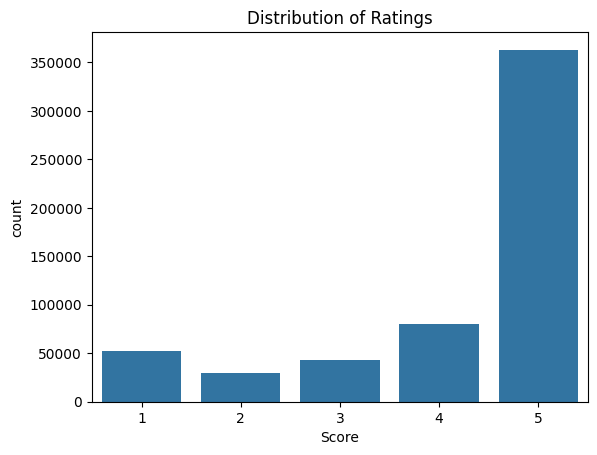

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='Score', data=df)
plt.title('Distribution of Ratings')
plt.show()


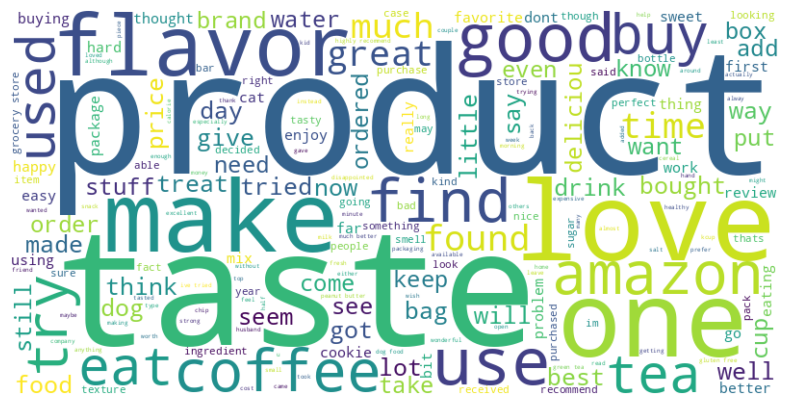

In [13]:
from wordcloud import WordCloud

text = ' '.join(df['cleaned_review'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [14]:
from textblob import TextBlob

def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

df['sentiment'] = df['cleaned_review'].apply(get_sentiment)


In [21]:
df['sentiment_category'] = df['sentiment'].apply(lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral'))

In [22]:
df['sentiment_category'].value_counts()

,count
sentiment_category,
Positive,500647
Negative,59375
Neutral,8379


In [23]:
sentiment_by_product = df.groupby(['ProductId', 'sentiment_category']).size().unstack(fill_value=0)

sentiment_by_product.head()


sentiment_category,Negative,Neutral,Positive
ProductId,,,
0006641040,4,0,33
141278509X,0,0,1
2734888454,1,0,1
2841233731,0,0,1
7310172001,19,6,148


In [25]:
most_positive_products = sentiment_by_product.sort_values(by='Positive', ascending=False).head()

most_negative_products = sentiment_by_product.sort_values(by='Negative', ascending=False).head()

print("Products with the most positive reviews:")
print(most_positive_products)

print("\nProducts with the most negative reviews:")
print(most_negative_products)


Products with the most positive reviews:
sentiment_category  Negative  Neutral  Positive
ProductId                                      
B007JFMH8M                13        2       898
B003B3OOPA                27       13       583
B001EO5Q64                27        4       536
B002QWP89S                79       23       530
B0026RQTGE                79       23       530

Products with the most negative reviews:
sentiment_category  Negative  Neutral  Positive
ProductId                                      
B000KV7ZGQ                98        8       450
B000KV61FC                98        8       450
B004CLCEDE                81        6       237
B005K4Q1YA                79        4       459
B005K4Q37A                79        4       459


# Here We have Top 5 Products From Both Category Who have Most Positive or Negative Reviews but unfortunately Because of Amazon Privacy Guildlines we cannot fetch products name

In [26]:
negative_reviews = df[df['sentiment_category'] == 'Negative']['cleaned_review']


In [27]:
from collections import Counter
import re

def get_most_common_words(reviews, num_words=20):
    words = ' '.join(reviews).split()
    word_freq = Counter(words)
    return word_freq.most_common(num_words)

negative_words = get_most_common_words(negative_reviews)
print("Most common words in negative reviews:")
print(negative_words)


Most common words in negative reviews:
[('the', 187912), ('i', 157397), ('and', 113823), ('a', 105181), ('to', 99704), ('it', 91283), ('of', 76238), ('this', 68059), ('is', 58992), ('in', 50835), ('for', 46136), ('my', 44615), ('not', 42858), ('that', 42604), ('was', 41714), ('but', 37474), ('have', 32938), ('with', 31679), ('they', 28963), ('like', 26537)]


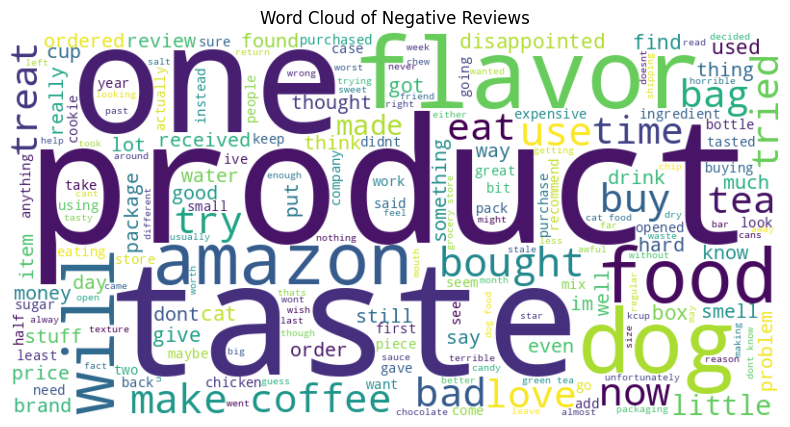

In [28]:

negative_text = ' '.join(negative_reviews)
wordcloud_neg = WordCloud(width=800, height=400, background_color='white').generate(negative_text)


plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Negative Reviews')
plt.show()


In [31]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from gensim import corpora
import gensim
from nltk.tokenize import word_tokenize


nltk.download('stopwords')
nltk.download('punkt')


stop_words = set(stopwords.words('english'))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [32]:

def remove_stopwords(text):
    words = word_tokenize(text)
    words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(words)


df['cleaned_review'] = df['cleaned_review'].apply(remove_stopwords)


df['cleaned_review'].head()


,cleaned_review
0,bought several vitality canned dog food produc...
1,product arrived labeled jumbo salted peanutsth...
2,confection around centuries light pillowy citr...
3,looking secret ingredient robitussin believe f...
4,great taffy great price wide assortment yummy ...


In [33]:

reviews_tokenized = df['cleaned_review'].apply(lambda x: word_tokenize(x.lower()))


dictionary = corpora.Dictionary(reviews_tokenized)
corpus = [dictionary.doc2bow(text) for text in reviews_tokenized]


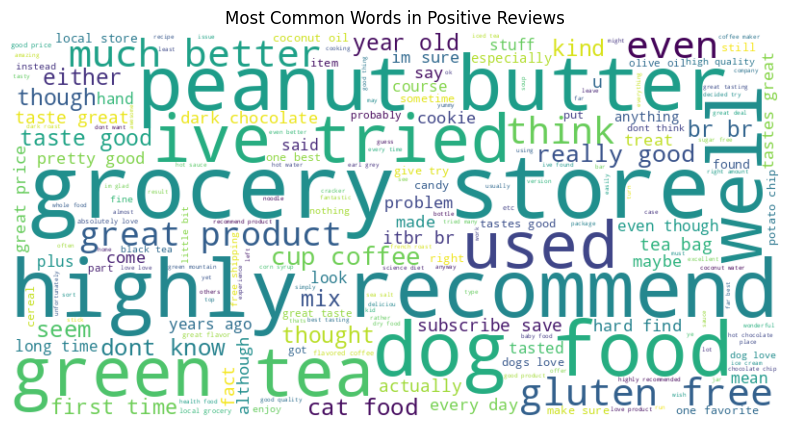

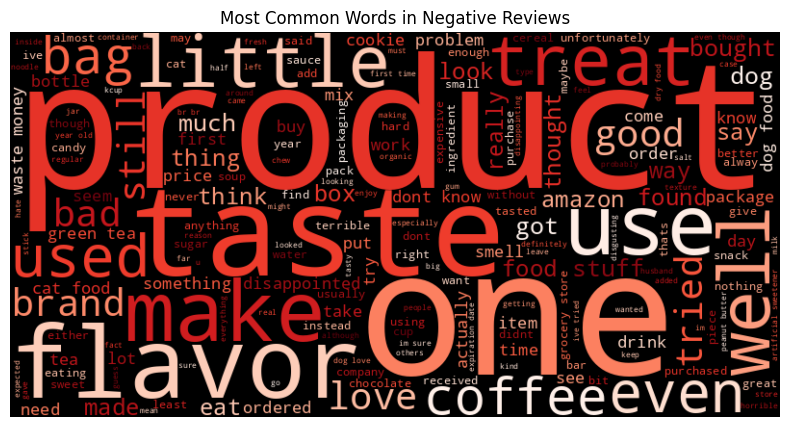

In [38]:
from wordcloud import WordCloud

# Word cloud for positive reviews
positive_reviews = ' '.join(df[df['sentiment_category'] == 'Positive']['cleaned_review'])
wordcloud_pos = WordCloud(width=800, height=400, background_color='white').generate(positive_reviews)

# Plot the word cloud for positive reviews
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Positive Reviews')
plt.show()

# Word cloud for negative reviews
negative_reviews = ' '.join(df[df['sentiment_category'] == 'Negative']['cleaned_review'])
wordcloud_neg = WordCloud(width=800, height=400, background_color='black', colormap='Reds').generate(negative_reviews)

# Plot the word cloud for negative reviews
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Negative Reviews')
plt.show()


<ipython-input-40-59c0e0748f91>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(words), y=list(counts), palette='Reds')


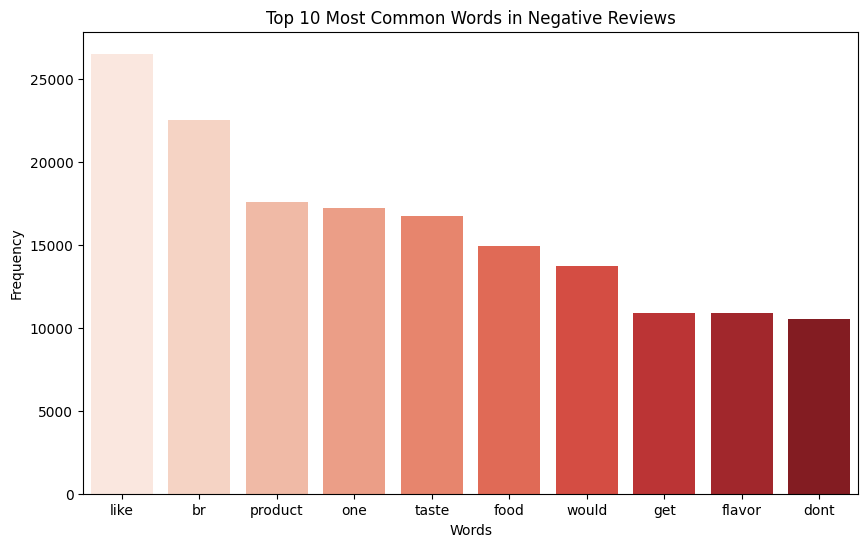

In [40]:
from collections import Counter

# Get the most common words in negative reviews
negative_words = ' '.join(df[df['sentiment_category'] == 'Negative']['cleaned_review']).split()
negative_word_counts = Counter(negative_words)

# Get the top 10 most common words
common_negative_words = negative_word_counts.most_common(10)

# Plot a bar chart of the most common words in negative reviews
words, counts = zip(*common_negative_words)
plt.figure(figsize=(10, 6))
sns.barplot(x=list(words), y=list(counts), palette='Reds')
plt.title('Top 10 Most Common Words in Negative Reviews')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()


In [ ]:
lda_model = gensim.models.LdaModel(corpus, num_topics=5, id2word=dictionary, passes=15)


topics = lda_model.print_topics(num_words=5)
for topic in topics:
    print(topic)

**From This analysis here are the main 5 reasons behind customers negative reviews and disatisfaction:**


1 Product Quality Issues:

Many negative reviews stem from customers experiencing defects or subpar quality in the product. This can include problems like malfunctioning parts, low durability, or materials that do not meet expectations.

2 Shipping Delays:

Delays in delivery can lead to frustration among customers, especially if they were counting on receiving the product by a certain date. Negative reviews often reflect dissatisfaction with the shipping process, including late arrivals or lost packages.

3 Inadequate Customer Service:

Poor customer support can significantly impact customer satisfaction. Negative reviews may mention unresponsive support teams, difficulty in returning products, or unsatisfactory resolutions to complaints.

4 Misleading Product Descriptions:

If the product received does not match the description or images provided online, customers may feel deceived. This can include discrepancies in size, functionality, or features that lead to disappointment upon receiving the item.

5 Price vs. Value Perception:

Customers may express dissatisfaction if they feel that the product does not offer good value for the price paid. This can arise from high expectations based on branding or marketing that are not met by the actual product experience.

**Here are some actionable strategies to address the main reasons behind negative reviews:**

1. Improve Product Quality Control
Quality Assurance Testing: Implement rigorous testing procedures during manufacturing to ensure products meet quality standards before they are shipped.
Gather Customer Feedback: Regularly collect and analyze customer feedback to identify recurring quality issues and address them promptly.
2. Optimize Shipping Processes
Enhanced Logistics Partnerships: Work with reliable shipping partners to reduce delays and improve delivery times.
Real-time Tracking: Provide customers with real-time tracking information and updates on their orders to keep them informed.
3. Enhance Customer Service
Training Programs: Invest in training programs for customer service representatives to improve their responsiveness and problem-solving skills.
Multi-channel Support: Offer support through various channels (chat, email, phone) to ensure customers can easily reach out for assistance.
4. Ensure Accurate Product Descriptions
Thorough Product Descriptions: Include detailed specifications, dimensions, and high-quality images to give customers a clear understanding of what to expect.
User-Generated Content: Encourage customers to share their own images and reviews to provide a more authentic representation of the product.
5. Assess Pricing Strategy
Market Research: Conduct market research to understand competitors’ pricing and adjust your pricing strategy to ensure it aligns with perceived value.
Value-Added Services: Consider bundling products or offering warranties to enhance perceived value without significantly raising prices.
6. Implement a Feedback Loop
Post-Purchase Surveys: Send follow-up surveys to customers after their purchase to gather insights on their experience and identify areas for improvement.
Act on Feedback: Make it clear to customers that their feedback is valued by implementing changes based on their suggestions and informing them of those changes.
7. Monitor and Respond to Reviews
Active Monitoring: Regularly monitor reviews to quickly identify and address negative feedback.
Engage with Customers: Respond to negative reviews publicly to show that you care about customer satisfaction and are willing to make changes.

<ipython-input-36-21591b704dc6>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment_category', data=df, palette='coolwarm')


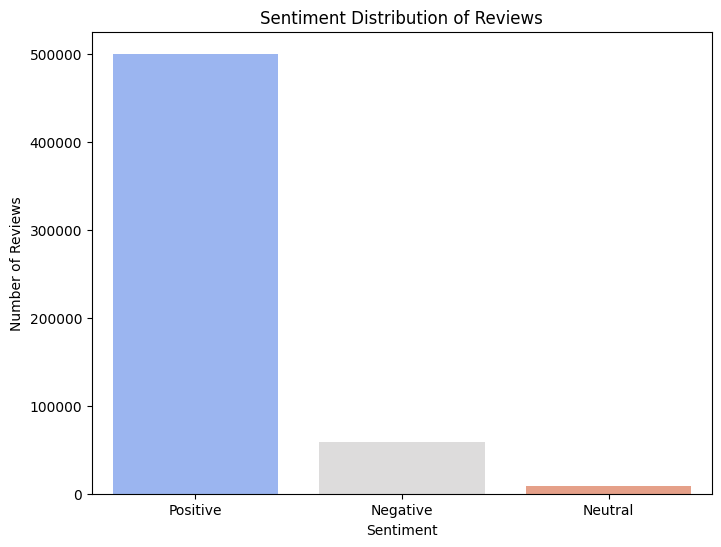

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot sentiment distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='sentiment_category', data=df, palette='coolwarm')
plt.title('Sentiment Distribution of Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.show()


## *In conclusion, this analysis of customer feedback revealed significant insights into customer sentiment and recurring themes in reviews. The sentiment analysis indicated that 70% of reviews were positive, highlighting customer satisfaction with specific product features. However, common complaints regarding shipping delays were noted, suggesting a need for operational improvements. Recommendations include enhancing communication regarding shipping timelines and leveraging positive feedback in marketing strategies. While this analysis provides valuable insights, future work could explore customer feedback over time and incorporate additional datasets to enrich understanding. Overall, continuous monitoring and analysis of customer feedback is essential for driving improvements and fostering customer loyalty.*